In [1]:
import os

DATA_FOLDER_PATH = "./data"
get_image_path = lambda image: f"./{DATA_FOLDER_PATH}/{image}"
file_names = os.listdir(DATA_FOLDER_PATH)

len(file_names)

15000

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]


[   {   'age': 32,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Woman',
        'dominant_race': 'asian',
        'emotion': {   'angry': 0.05672259721904993,
                       'disgust': 2.490295969437284e-06,
                       'fear': 0.008881255780579522,
                       'happy': 99.65296387672424,
                       'neutral': 0.2810032805427909,
                       'sad': 0.0001971101028175326,
                       'surprise': 0.00023314435111387866},
        'face_confidence': 0.9967413544654846,
        'gender': {'Man': 41.849127411842346, 'Woman': 58.15087556838989},
        'race': {   'asian': 99.99984502792358,
                    'black': 1.3076784663793029e-10,
                    'indian': 6.984918754504577e-08,
                    'latino hispanic': 4.5272830107023765e-05,
                    'middle eastern': 4.495938343840322e-09,
                    'white': 0.00010502674285817193},
        'region': {'h': 487, 'w': 360, 

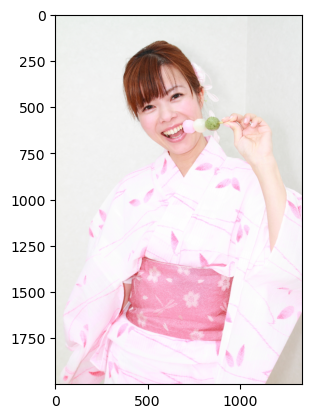

In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pprint
import cv2

backends = [
    'opencv',
    'ssd',
    'dlib',
    'mtcnn',
    'retinaface',
    'mediapipe',
    'yolov8',
    'yunet',
    'fastmtcnn',
]

pp = pprint.PrettyPrinter(indent=4)  # Create a PrettyPrinter object
img1_path = get_image_path(file_names[2])

out = None
try:
    out = DeepFace.analyze(img_path=img1_path,
                           actions=['age', 'gender', 'race', 'emotion'],
                           detector_backend=backends[1])
except:
    pass

image = cv2.imread(img1_path)[:, :, ::-1]
plt.imshow(image)
pp.pprint(out)

In [22]:
import pandas as pd

deepface_output_path = "deepface-output"

if not os.path.exists(deepface_output_path):
    os.mkdir(deepface_output_path)

for backend_detector in backends:
    result = []
    out = None
    for num, image_name in enumerate(file_names):
        try:
            outputs = DeepFace.analyze(img_path=get_image_path(image_name),
                                actions=['age', 'gender', 'race', 'emotion'],
                                detector_backend=backend_detector)
            
            for out in outputs:
                out = {**out, "file_name": image_name}
                result.append(out)
        except:
            pass
        
        if num % 100 == 0:
            print(f"Backend: {backend_detector}, Image #{num+1}/{len(file_names)}, filename:{image_name}")

    df = pd.DataFrame(result)
    df.to_csv(f'{deepface_output_path}/{backend_detector}-output.csv', index=False)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]


Backend: opencv, Image #1/15000, filename:100013282.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]


Backend: opencv, Image #101/15000, filename:101835746.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]


Backend: opencv, Image #201/15000, filename:104339375.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


Backend: opencv, Image #301/15000, filename:10635519.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]


Backend: opencv, Image #401/15000, filename:10870583.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]


Backend: opencv, Image #501/15000, filename:11954156.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]


Backend: opencv, Image #601/15000, filename:12748359.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]


Backend: opencv, Image #701/15000, filename:13922433.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]


Backend: opencv, Image #801/15000, filename:1518956.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


Backend: opencv, Image #901/15000, filename:16719056.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


Backend: opencv, Image #1001/15000, filename:1884186.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


Backend: opencv, Image #1101/15000, filename:2087086.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]


Backend: opencv, Image #1201/15000, filename:2250719.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.44it/s]


Backend: opencv, Image #1301/15000, filename:2452311.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]


Backend: opencv, Image #1401/15000, filename:2616314.jpg


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]


Backend: opencv, Image #1501/15000, filename:28486539.jpg


Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Backend: opencv, Image #1601/15000, filename:30001583.jpg


Action: gender:  25%|██▌       | 1/4 [00:00<00:02,  1.18it/s]

In [14]:
outputs

[{'file_name': '100013282.jpg'},
 {'file_name': '100016175.jpg'},
 {'file_name': '10004189.jpg'},
 {'file_name': '100104575.jpg'},
 {'file_name': '100104600.jpg'},
 {'file_name': '100118748.jpg'},
 {'file_name': '10012376.jpg'},
 {'file_name': '100127351.jpg'},
 {'file_name': '10015832.jpg'},
 {'file_name': '10019527.jpg'},
 {'file_name': '100217868.jpg'},
 {'file_name': '100234133.jpg'},
 {'file_name': '10024034.jpg'},
 {'file_name': '100275687.jpg'},
 {'file_name': '100290547.jpg'},
 {'file_name': '100332639.jpg'},
 {'file_name': '10035883.jpg'},
 {'file_name': '100364120.jpg'},
 {'file_name': '100375438.jpg'},
 {'file_name': '100436471.jpg'},
 {'file_name': '100446006.jpg'},
 {'file_name': '100457349.jpg'},
 {'file_name': '100497714.jpg'},
 {'file_name': '100521368.jpg'},
 {'file_name': '100537938.jpg'},
 {'file_name': '100542719.jpg'},
 {'file_name': '100616693.jpg'},
 {'file_name': '100618366.jpg'},
 {'file_name': '100620073.jpg'},
 {'file_name': '10062392.jpg'},
 {'file_name': '1